In [1]:
from math import sqrt
import pandas as pd

In [51]:
colors = ["brown", "black", "gray", "black", "black", "green",
"green", "brown", "red", "black", "brown", "white", "brown", "black", "green",
"black", "black", "green"]
lengths = [8, 5, 2, 2, 24, 5, 1, 2, 125, 2, 4, 5, 34, 6, 7, 5, 16, 92]

In [52]:
df = pd.DataFrame({
"length": lengths,
"color": colors})

In [53]:
def mean(vec : list):
    return(sum(vec) / len(vec))

In [54]:
def variance(vec : list):
    mu = mean(vec)
    return(sum(pow(x-mu,2) for x in vec) / len(vec))

In [55]:
def std(vec : list):
    return(sqrt(variance(vec)))

In [56]:
def z_normalize(vec : list):
    mu = mean(vec)
    sigma = std(vec)
    return([(mu - xbar) / sigma for xbar in vec])

In [57]:
def z_trim(vec : list, fill = None, limit = 2.0):
    mu = mean(vec)
    sigma = std(vec)
    normed = z_normalize(vec)
    offset = 0
    for e, i in enumerate(normed):
        if i > limit or i < -limit:
            if fill == None:
              del vec[e - offset]
              offset += 1
            else:
              vec[e - offset] = fill
    return(vec)

In [58]:
z_trim([5, 10, 15, 20, 25, 90], 5)

[5, 10, 15, 20, 25, 5]

In [59]:
z_normalize([5, 10, 15])

[1.224744871391589, 0.0, -1.224744871391589]

In [82]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [83]:
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=['r', 'g', 'b', 'y'])

(array([13.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  1.]),
 array([  1. ,  13.4,  25.8,  38.2,  50.6,  63. ,  75.4,  87.8, 100.2,
        112.6, 125. ]),
 <BarContainer object of 10 artists>)

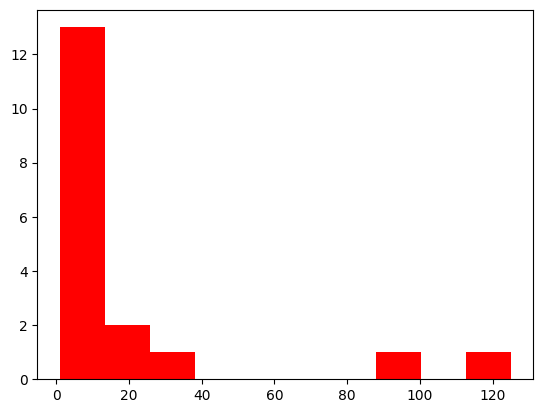

In [84]:
plt.hist(df["length"])

In [85]:
trimmed_vec = z_trim(lenvec, fill = mean(lenvec))

(array([1., 4., 0., 0., 1., 4., 1., 2., 1., 2.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <BarContainer object of 10 artists>)

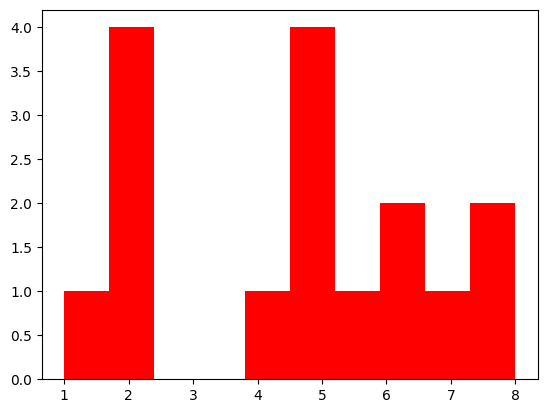

In [86]:
plt.hist(trimmed_vec)